<a href="https://colab.research.google.com/github/yareth03/Simulaci-n-1/blob/main/A%26R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tasa de aceptación: 50.57%
Media muestral: 3.0000 vs Media teórica: 3.0000
Desviación estándar muestral: 0.8124 vs Desviación teórica: 0.8165


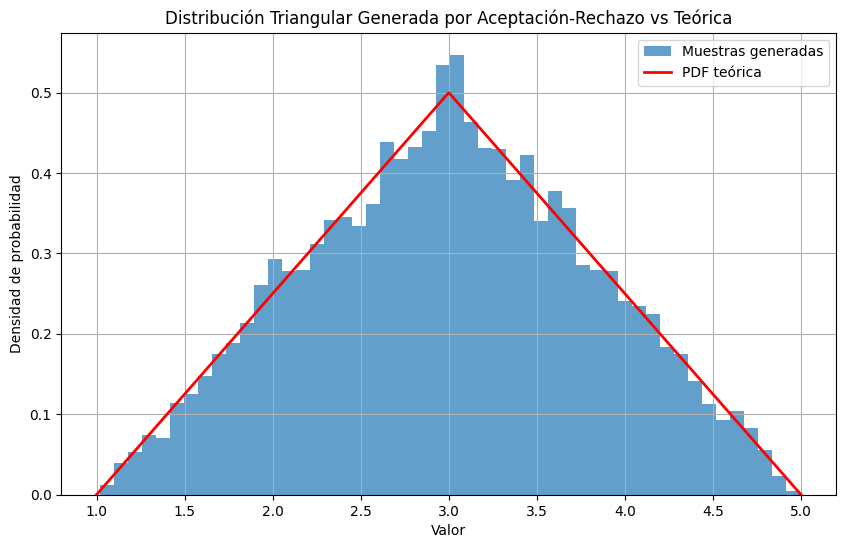

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

# Parámetros de la distribución triangular
minimo = 1   # a
maximo = 5   # b
moda = 3     # c (pico)

# Función de densidad de probabilidad triangular
def pdf_triangular(x, minimo, maximo, moda):
    # Primera parte: de a a c
    mascara_izq = (x >= minimo) & (x <= moda)
    # Segunda parte: de c a b
    mascara_der = (x > moda) & (x <= maximo)

    # Inicializar resultados con ceros
    resultado = np.zeros_like(x)

    # Calcular densidad para cada parte
    resultado[mascara_izq] = (2 * (x[mascara_izq] - minimo)) / ((maximo - minimo) * (moda - minimo))
    resultado[mascara_der] = (2 * (maximo - x[mascara_der])) / ((maximo - minimo) * (maximo - moda))

    return resultado

# Método de aceptación y rechazo
def aceptacion_rechazo_triangular(num_muestras, minimo, maximo, moda):
    # Valor máximo de la PDF
    altura_maxima = 2 / (maximo - minimo)

    muestras_aceptadas = []
    intentos = 0

    while len(muestras_aceptadas) < num_muestras:
        # Generar muestra candidata uniforme en [a,b]
        x_candidato = np.random.uniform(minimo, maximo)

        # Generar valor y uniforme en [0, altura_maxima]
        y_candidato = np.random.uniform(0, altura_maxima)

        # Evaluar PDF en el punto candidato
        densidad = pdf_triangular(np.array([x_candidato]), minimo, maximo, moda)

        # Criterio de aceptación
        if y_candidato <= densidad:
            muestras_aceptadas.append(x_candidato)

        intentos += 1

    tasa_aceptacion = num_muestras / intentos
    print(f"Tasa de aceptación: {tasa_aceptacion:.2%}")

    return np.array(muestras_aceptadas)

# Generación de números aleatorios
np.random.seed(42)  # Para reproducibilidad
numero_muestras = 10000
muestras = aceptacion_rechazo_triangular(numero_muestras, minimo, maximo, moda)

# Cálculo de estadísticas muestrales
media_muestral = np.mean(muestras)
desviacion_muestral = np.std(muestras)

# Cálculo de estadísticas teóricas
parametro_c = (moda - minimo) / (maximo - minimo)
distribucion_teorica = triang(c=parametro_c, loc=minimo, scale=(maximo-minimo))
media_teorica = distribucion_teorica.mean()
desviacion_teorica = distribucion_teorica.std()

# Resultados
print(f"Media muestral: {media_muestral:.4f} vs Media teórica: {media_teorica:.4f}")
print(f"Desviación estándar muestral: {desviacion_muestral:.4f} vs Desviación teórica: {desviacion_teorica:.4f}")

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(muestras, bins=50, density=True, alpha=0.7, label='Muestras generadas')

# Función de densidad de probabilidad teórica
valores_x = np.linspace(minimo, maximo, 1000)
plt.plot(valores_x, distribucion_teorica.pdf(valores_x), 'r-', lw=2, label='PDF teórica')

plt.title('Distribución Triangular Generada por Aceptación-Rechazo vs Teórica')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()